In [1]:
from traffic import *
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import statistics as st

# Creation of Car and Simulation Objects
In this code, the parade of cars is created as new objects and passed to the simulation object. Some sample runs are then performed and representative outputs of the system's state are offered at the end.

In [2]:
Ncars = 30
sim = Simulation(30)
sim.run_once()

This snippet establishes the simulation and does a single round

In [3]:
sim.run(5)

Here, it is run for a few seconds

In [4]:
def plot_things(dist, speed):
    Ncars = len(dist)
    
    x_vals = np.linspace(0, Ncars, num=Ncars)
    plt.subplot(2, 1, 1)
    plt.plot(x_vals, dist)
    plt.title("Distance to next car (m)")
    plt.xlabel("Car number")
    plt.ylabel("m")
    plt.axis((0, len(x_vals), 0, 100))
    plt.show()

    plt.subplot(2, 1, 2)
    plt.plot(x_vals, speed)
    plt.title("Speed of car (m/s)")
    plt.xlabel("Car number")
    plt.ylabel("m/s")
    plt.axis((0, len(x_vals), 0, 35))
    plt.show()

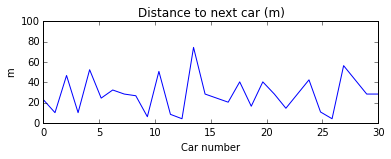

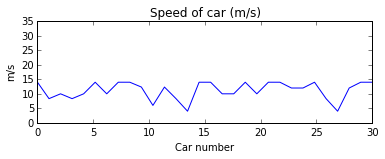

In [5]:
plot_things(sim.dist_list(), sim.speed_list())

All cars begin with a speed of zero. In this cross-section of the simulation, even the fastest cars are still accelerating. They can increase speed by 2 m/s per second at most, and their top speed is 33.3 m/s. At this point, they have ran for 6 seconds, yielding a maximum speed of 12 m/s, which corresponds to the data on the plot. In spite of being early in the simulation, substantial variation in positions is already revealing itself.

In [6]:
sim.run(60)

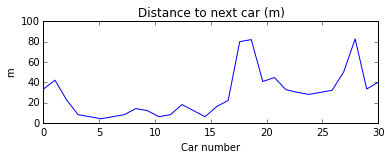

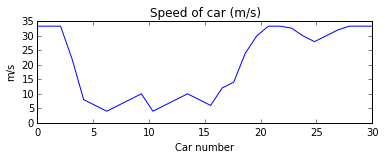

In [7]:
plot_things(sim.dist_list(), sim.speed_list())

After 1 more minute, the cars have had sufficient time to accelerate to full speed. Yet, there is a very large amount of variation in the car spacing distance as well as the speed. Only a select few cars have been able to accelerate to a level close to their maximum speed. The rest of the cars are somehow constrained by the proximity of the car in front of them, and that's what most of the speed values represent.

#Statistics and the Global Picture of Normal Mode
The following code resets the simulation to time=0 and runs forward in time keeping track of variables useful for tracking the overall progress and state of the traffic moving on the road. This involves using a variety of storage containers which are graphed later on.

In [8]:
sim = Simulation(30) # reset

In [9]:
Ntime = 2000 # 2,000 seconds = 33.3 minutes, standard simulation range

In [10]:
avg_speed, full_hist = sim.produce_history(Ntime)

In [11]:
def speed_plots(avg_speed, full_hist):
    Ntime = len(full_hist)
    time_plt = [i for i in range(Ntime)]

    fig = plt.figure(figsize=(7,6))
    plz = fig.add_subplot(2, 2, 1)
    plz.plot(time_plt[:int(Ntime/10)], avg_speed[:int(Ntime/10)])
    plt.title("Average speed over 200 s")
    plt.xlabel("time (s)")
    plt.ylabel("speed (m/s)")
    plz.axis((0,int(Ntime/10),0,35))

    plz = fig.add_subplot(2, 2, 2)
    plz.plot(time_plt, avg_speed)
    plt.title("Average speed over 2,000 s")
    plt.xlabel("time (s)")
    plz.axis((0,Ntime,0,35))
    
    if len(full_hist[0]) == 30:
        tlen = 1000
    else:
        tlen = 7000
    speed_hist = [[(full_hist[j+1][i] - full_hist[j][i])%tlen for i in range(Ncars)] for j in range(Ntime-1)]
    speed_list = [x for sublist in speed_hist[-60:] for x in sublist] # hist of last minute of speeds in sim
    v_range = int(max(speed_list) - min(speed_list))+1
    plz = fig.add_subplot(2, 1, 2)
    plz.hist(speed_list, bins = v_range)
    plt.ylabel("Frequencies of speeds")
    plt.xlabel("Speed (m/s)")
    

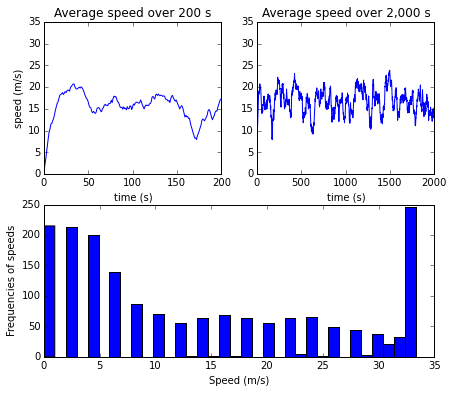

In [12]:
speed_plots(avg_speed, full_hist)

These graphs show the evolution of the average car speed over two time frames. It is seen that speed increases quickly from zero to around 15 m/s, but then some resistence is obviously being encountered due to traffic jams. Over a longer-time picture, there is clear a large amount of natural variation about the mean.

In [13]:
def color_plot(full_hist, last=False):
    maxt = 500
    Nc = len(full_hist[0])
    if Nc == 30:
        x_size = 5
        track_len = 1000
    else:
        x_size = 12
        track_len = 7000
#    x_size = Ncars*12/120
    colors = np.random.rand(Nc)
    plt.figure(figsize=(x_size,10))
    N = len(full_hist)
    if last:
        k_range = range(N-maxt, N)
    else:
        k_range = range(maxt)
    for k in k_range:
        plt.scatter(full_hist[k], [k for i in range(Nc)], marker=u'|', c=colors)
    plt.title("Car positions over time")
    plt.xlabel("position on road (m)")
    plt.ylabel("simulation time (s)")
    if last:
        plt.axis((0, track_len, 2000-maxt, 2000))
    else:
        plt.axis((0, track_len, 0, maxt))
    plt.show()

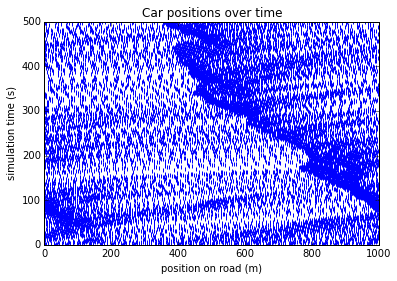

In [14]:
maxt = 500
for k in range(maxt):
    plt.scatter(full_hist[k], [k for i in range(Ncars)], marker=u'|')
plt.title("Car positions over time")
plt.xlabel("position on road (m)")
plt.ylabel("simulation time (s)")
plt.axis((0, 1000, 0, maxt))
plt.show()

I've used the color plots for the rest of the assignment, but the classic blue still has its own unique sort of appeal.

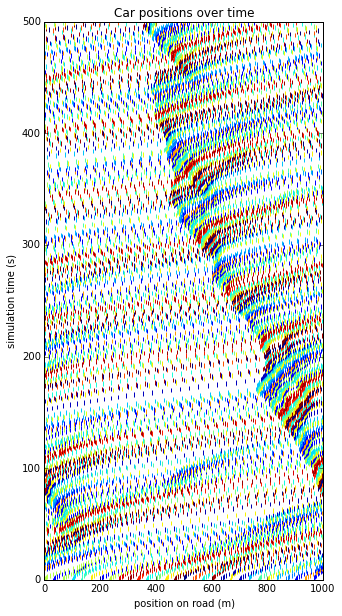

In [15]:
color_plot(full_hist)

This graphic shows traffic waves develop and propogate over time. There seems to be a constant rate of movement of the wave-front in the reverse of the direction of car motion. However, the behavior is overall rather complicated with some forking and diverging also seen.

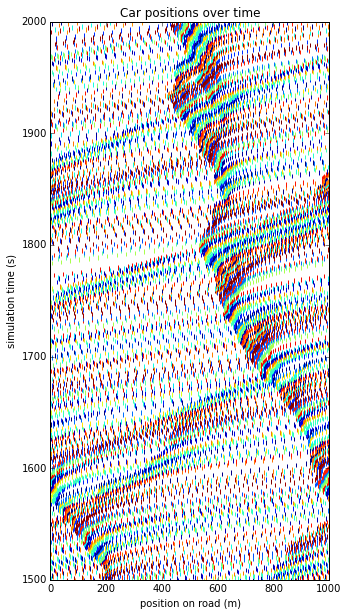

In [16]:
color_plot(full_hist, True)

This is a more detailed picture of the car positions after traffic has fully developed (with color). It can be see that traffic waves still exist, but it is not necessarily a coherent wave. The wave may somewhat dissipate and then pick up again from a spontaneous point. Or there may be various forking and merging behavior.

In [17]:
print(sim.suggest_speed())

 mean= 16.7792 
 stdev= 11.4388
  suggested speed= 28.218 m/s 
                 = 101.5847 km/h  with expected variation: 0.3617 
                 = 101 km/h 



Note, sometimes this gives 101 km/h and sometimes it gives 100 km/h, which is almost certainly due to the statistical variation. Since we are rounding down, it's very difficult to entirely eliminate these variations entirely. The expected variation on the answer is obtained by std/sqrt(N), where N is the number of samples. This is a statistically faithful estimate in the STD deviation in the answer if the workbook is executed many times over. This should be kept in mind for the traffic planners, but they will more likely choose 100 because it is a very round number.

In [18]:
def print_speeds(sim):
    N = 5000
    mu, sd = sim.mean_sd(N)
    
    print("mean: "+str(round(mu,4))+" m/s  std: "+str(round(sd,4))+" m/s")
    print("mean: "+str(round(mu*3.6,4))+" km/h std: "+str(round(sd*3.6,4))+" km/h")
    sugg = (mu+sd)*3.6
    print("    suggested speed limit: "+str(round((mu+sd)*3.6))+" km/h")
    print("    statistical error in answer: "+str(round(sd/math.sqrt(N),4)))
    return sugg

In [19]:
normal = print_speeds(sim)

mean: 16.7443 m/s  std: 2.7985 m/s
mean: 60.2794 km/h std: 10.0747 km/h
    suggested speed limit: 70.0 km/h
    statistical error in answer: 0.0396


This is the suggested speed limit based on the standard deviation the per-second mean speeds.

# Normal and Nightmare Mode Combined

In [20]:
sim = Simulation(30, False, True) # not on hard mode, but still on nightmare mode

In [21]:
avg_speed, full_hist = sim.produce_history(Ntime)

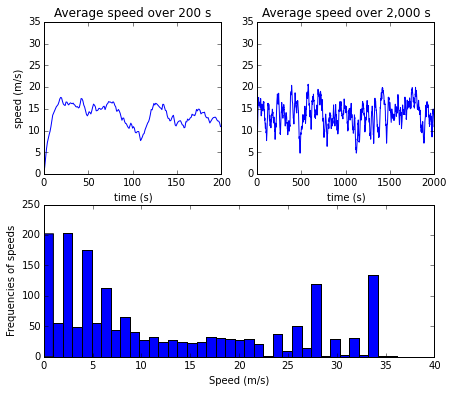

In [22]:
speed_plots(avg_speed, full_hist)

In the historgram of the (fully developed) speeds, we can see artifacts from various top speeds of different cars. However, we don't see the top speed of the agressive driver. It never ocurred in the interval here because it is an extremely rare event. Agressive drivers are also always held up behind someone else. The difference in odd/even bins is expected. It is because speeds fall into a different odd/even category when starting from top speed versus starting from 0.

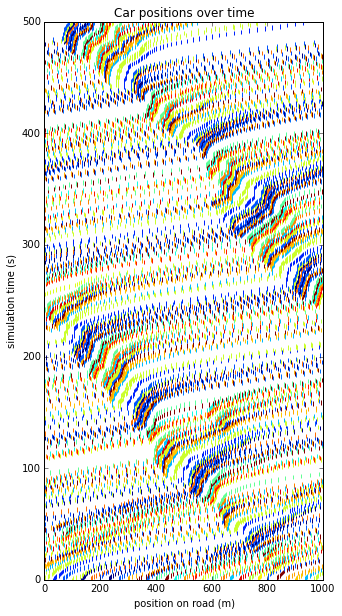

In [23]:
color_plot(full_hist)

This shows a different characteristic to the traffic waves. Also, some lines can be observed within the waves which go in an upper-right pattern. This is likely the commercial trucks slowing traffic down in the midst of a crowded road - an experience I'm sure we can all relate to.

The graph for the final part of the 2,000 second simulation was consulted, and there was not a noticable difference in the characteristic of the traffic pattern.

In [24]:
print(sim.suggest_speed())

 mean= 14.1752 
 stdev= 10.1879
  suggested speed= 24.3631 m/s 
                 = 87.7071 km/h  with expected variation: 0.3222 
                 = 87 km/h 



With a mixed car composition, the suggested speed limit is lower than with only normal drivers.

In [25]:
normal_nightmare = print_speeds(sim)

mean: 14.2712 m/s  std: 2.9003 m/s
mean: 51.3762 km/h std: 10.4412 km/h
    suggested speed limit: 62.0 km/h
    statistical error in answer: 0.041


#Hard Mode
In this version the cars move along a 7 km stretch of track, where each 1 km segment may have its own unique properties.

In [26]:
sim = Simulation(30, True) # car density of 30 cars/km, hard mode on

In [27]:
sim.run(5)

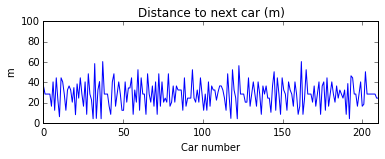

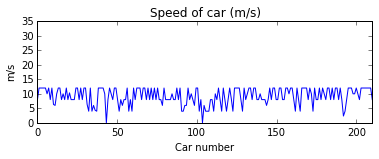

In [28]:
plot_things(sim.dist_list(), sim.speed_list())

This plot shows spacings and speed of all 30x7=210 cars along the road at 5 seconds into the simulation. The gradual speed increase can be seen. There is also a visual difference in slowdown for the central segment of the track, which has the highest chance of drivers randomly braking.

In [29]:
sim.run(60)

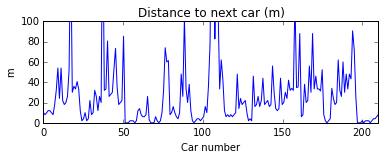

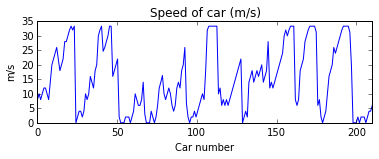

In [30]:
plot_things(sim.dist_list(), sim.speed_list())

This picture of cars 60 seconds after the last snapshot displays a much more complicated picture. Some cars are going very fast but some are going very slowly. It looks like traffic jams might be a regular occurance at various locations along the road.

#Statistics and the Global Picture of Hard Mode
Simulation is rebooted, keeping several metrics to analyize later.

In [31]:
sim = Simulation(30, True)
Ncars = 7*30

In [32]:
avg_speed, full_hist = sim.produce_history(Ntime)

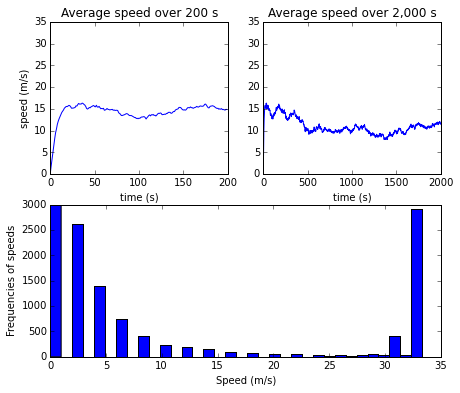

In [33]:
speed_plots(avg_speed, full_hist)

Similar to normal mode, there is a quick increase in speed from 0 to come in line with a longer-term speed value. Interestingly, the mean speed seems to quickly fall off of an initial plateu. This might have been somewhat predictable, as the faster segments aren't as hindered by echo effects from the rocky segments for the first few segements. After the first minute or two, the rocky parts of the road may be sending traffic waves into the faster stretches and disrupting traffic there. The historgram is giving data for the fully developed flow - and it shows a section where cars travel at nearly full speed while most other speeds cluster toward low speeds.

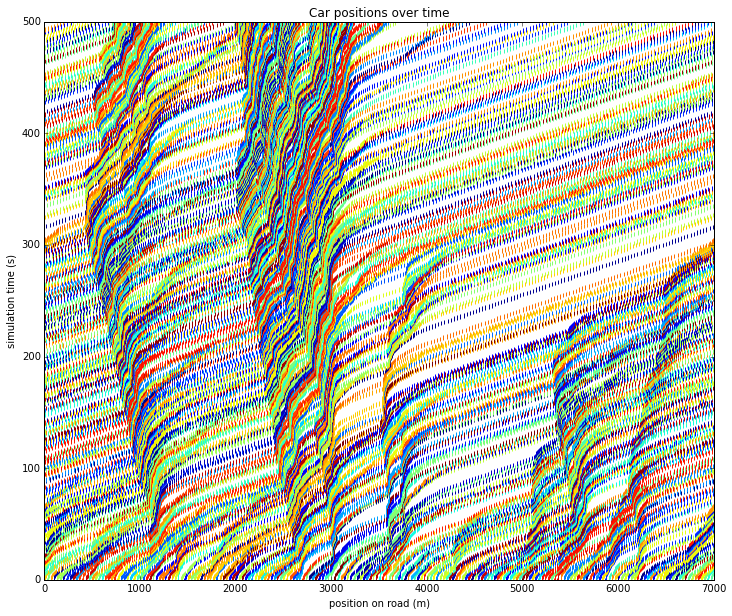

In [34]:
color_plot(full_hist)

In the first 500 seconds, the traffic pattern is setill developing. You can see traffic waves spontaneously emerge, and then later consolidate.

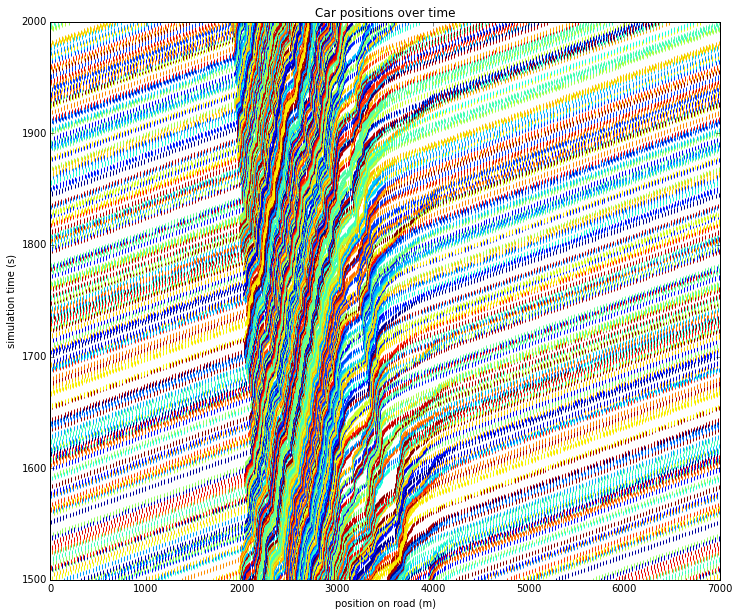

In [35]:
color_plot(full_hist, True)

After sufficient time has passed in the simulation, the traffic pattern has fully matured and we get a very different picture. Almost all of the bottleneck is concentrated around the start of the rockiest section of the road. Between 3000 to 4000 meters on the distance of this road, the chance of braking is 20% every second. Traffic is backed up almost a mile behind the 3 km point, even though this section would otherwise flow smoothly. Even along the 3-4 km section there doesn't appear to be much congestion. However, upon closer inspection it can be seen that cars still travel at a slower speed through this segment. It just happens that the main traffic wave is stationary and lies at the start of the rockiest section. This is a meaningful conclusion of this simulation if it is a real effect.

In [36]:
print(sim.suggest_speed())

 mean= 10.0273 
 stdev= 12.5426
  suggested speed= 22.5699 m/s 
                 = 81.2518 km/h  with expected variation: 0.3966 
                 = 81 km/h 



This is the final conclusion of this project's hard mode. The suggsted speed limit would be 80 or 81 km/h, which is notably slower than the normal mode. This should not be surprising since this 7 km stretch generally consists of more difficult terrain.

In [37]:
hard = print_speeds(sim)

mean: 10.4342 m/s  std: 0.8963 m/s
mean: 37.5632 km/h std: 3.2266 km/h
    suggested speed limit: 41.0 km/h
    statistical error in answer: 0.0127


#Nightmare Mode
In this section, the hard mode road characteristics is combined with the nightmare mode car types. This means that we have a 7-km section of repeating road with 30 cars per km where there are 3 types of cars. Those types are normal, agressive, and commercial.

In [38]:
sim = Simulation(30, True, True)

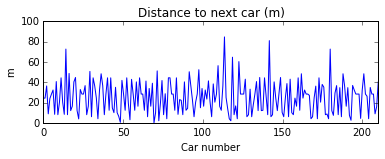

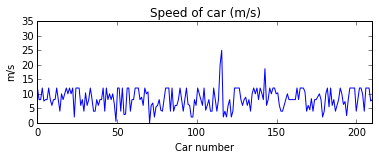

In [39]:
sim.run(5)
plot_things(sim.dist_list(), sim.speed_list())

We can see some influence of extremely agressive drivers. They are few in number, but they stand out due to a higher preference for acceleration. Their speed is largely limited by the car in front of them.

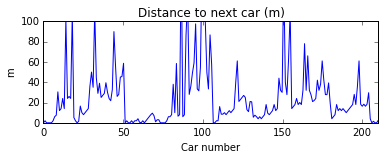

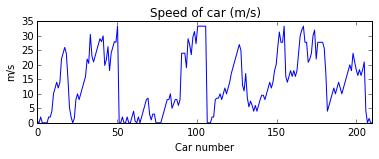

In [40]:
sim.run(60)
plot_things(sim.dist_list(), sim.speed_list())

It's more difficult to pick apart the impact of different drivers here, but there is a good reason to believe that this these graphs have sharper spikes than the other cases because comercial vehicles will not accelerate to the same level as normal cars, creating an unusual amount of space in front of them.

In [41]:
sim = Simulation(30, True, True)
avg_speed, full_hist = sim.produce_history(Ntime)

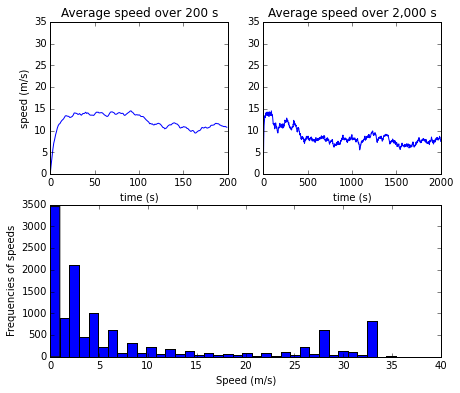

In [42]:
speed_plots(avg_speed, full_hist)

The speed evolution here shows an even sharper plateu than in the "hard" mode. This is probably reflecting the stricter speed limitations imposed by the commercial vehicles, which do not fully manafest until the other cars have had time to pile up behind them. The histogram shows very few high-speed clusters, except for around the commercial driver's perferred speed.

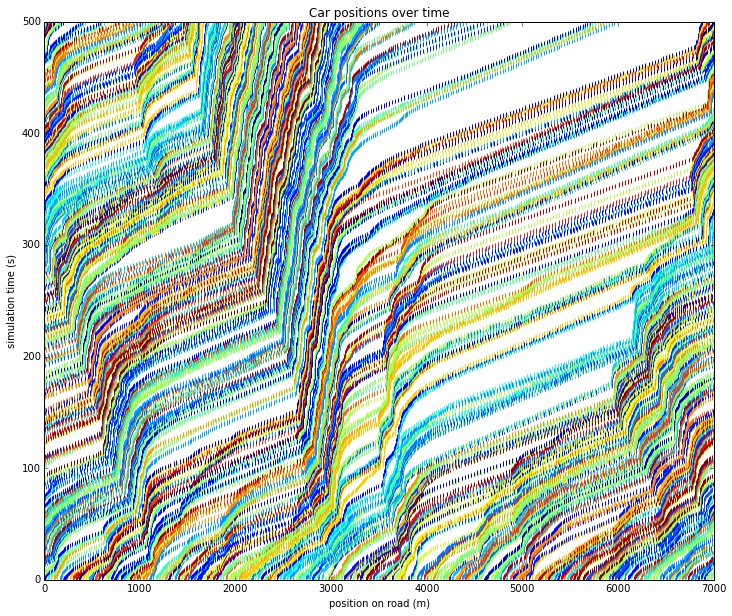

In [43]:
color_plot(full_hist)

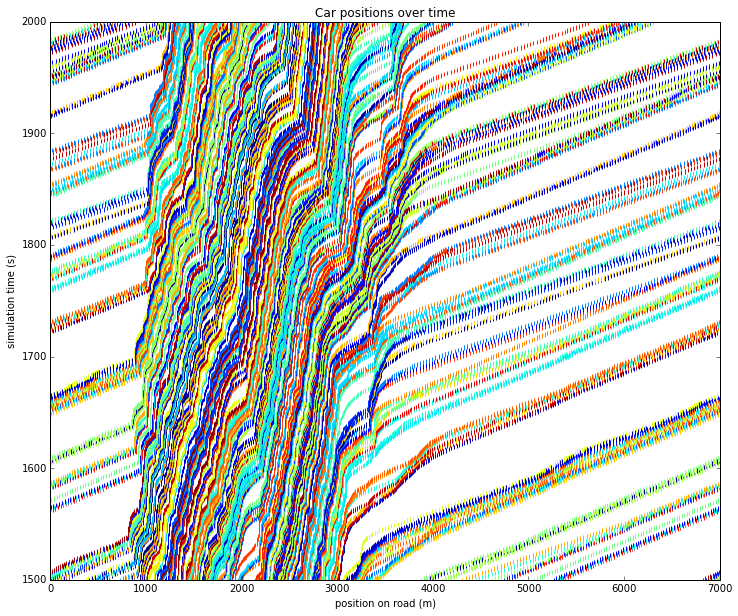

In [44]:
color_plot(full_hist, True)

We see the central traffic wave due to the terrain, but we also see a new a facinating emergence - the commercial vehicles hold up traffic even in the open zones. These are seen as bars outside of the main traffic jam. Even after the speedy cars escape the main jam due to the turn, they will soon pile up behind a commercial vehicle for the straighter portions until they come back around to the main jam. I imagine that the agressive drivers spend almost all their driving time limited by the car in front of them.

In [45]:
print(sim.suggest_speed())

 mean= 8.4093 
 stdev= 10.2443
  suggested speed= 18.6535 m/s 
                 = 67.1528 km/h  with expected variation: 0.324 
                 = 67 km/h 



This result is the slowest of all.

In [46]:
nightmare = print_speeds(sim)

mean: 7.9026 m/s  std: 1.2281 m/s
mean: 28.4493 km/h std: 4.4213 km/h
    suggested speed limit: 33.0 km/h
    statistical error in answer: 0.0174


In [47]:
print("Final speed limit suggestions in km/hr")
print("normal            "+str(round(normal)))
print("normal-nightmare: "+str(round(normal_nightmare)))
print("hard              "+str(round(hard)))
print("nightmare         "+str(round(nightmare)))

Final speed limit suggestions in km/hr
normal            70.0
normal-nightmare: 62.0
hard              41.0
nightmare         33.0
